In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
import time

In [16]:

############### FORMA 1
vda   = np.loadtxt("/home/mikel/Documents/Facultad/IA/tp-ia/samplesVDA1.txt")


cant_datos = vda.shape[0]
medidas_x_segundo = 400
npyarray=np.array
tiempo = np.arange(0,cant_datos/400,1/medidas_x_segundo)
tiempo = tiempo*1000


data_y = vda.reshape(-1,1) 
data_x = tiempo.reshape(-1,1)

####################################
# saco los ulitmos 5 datos del vector vda para usarlos en testing. uso masomenos el 15% de los datos para testing.
ultimos_50_elementosvda =  data_y[-50:].copy() 
data_y = data_y[:-50]

ultimos_50_elementostiempo = data_x[-50:].copy() 
data_x = data_x[:-50]

####################################

data = np.hstack((data_y,data_x))

In [15]:
# FORMA 2: ACA SEPARO LOS DATOS DE MEJOR FORMA

from sklearn.model_selection import train_test_split
import numpy as np

# Cargar los datos desde el archivo de texto
vda   = np.loadtxt("samplesVDA1.txt")



cant_datos = vda.shape[0]
medidas_x_segundo = 400 
npyarray=np.array
tiempo = np.arange(0,cant_datos/400,1/medidas_x_segundo)
tiempo = tiempo*1000

print(f"{tiempo}")

data_y = vda.reshape(-1,1) 
data_x = tiempo.reshape(-1,1)


#####################################################


# Divide los datos en conjuntos de entrenamiento y prueba
vda_entrenamiento, vda_prueba, tiempo_entrenamiento, tiempo_prueba = train_test_split(data_y, data_x, test_size=0.2, random_state=42)



data = np.hstack((vda_entrenamiento,tiempo_entrenamiento)) # datos de entrenamiento
dataTest = np.hstack((vda_prueba,tiempo_prueba)) # datos testing

print(f"tamanio original de los datos: {data_y.size}")
# Imprime los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", vda_entrenamiento.shape)
print("Tamaño del conjunto de prueba:", vda_prueba.shape)

########################################################
#excelente

FileNotFoundError: samplesVDA1.txt not found.

In [ ]:
print(data) # HAY QUE NOTAR QUE NO QUEDAN ORDENADOS (LOS TIEMPOS QUEDAN DESORDENADOS)!

[[421.    0. ]
 [424.    2.5]
 [431.    5. ]
 [440.    7.5]
 [455.   10. ]
 [474.   12.5]
 [495.   15. ]
 [518.   17.5]
 [542.   20. ]
 [565.   22.5]
 [587.   25. ]
 [608.   27.5]
 [627.   30. ]
 [645.   32.5]
 [659.   35. ]
 [669.   37.5]
 [675.   40. ]
 [679.   42.5]
 [678.   45. ]
 [674.   47.5]
 [669.   50. ]
 [662.   52.5]
 [652.   55. ]
 [644.   57.5]
 [635.   60. ]
 [624.   62.5]
 [615.   65. ]
 [606.   67.5]
 [597.   70. ]
 [589.   72.5]
 [582.   75. ]
 [575.   77.5]
 [570.   80. ]
 [566.   82.5]
 [562.   85. ]
 [560.   87.5]
 [559.   90. ]
 [558.   92.5]
 [560.   95. ]
 [560.   97.5]
 [563.  100. ]
 [565.  102.5]
 [568.  105. ]
 [571.  107.5]
 [572.  110. ]
 [573.  112.5]
 [573.  115. ]
 [572.  117.5]
 [569.  120. ]
 [567.  122.5]
 [564.  125. ]
 [562.  127.5]
 [560.  130. ]
 [558.  132.5]
 [558.  135. ]
 [557.  137.5]
 [557.  140. ]
 [557.  142.5]
 [558.  145. ]
 [559.  147.5]
 [559.  150. ]
 [559.  152.5]
 [560.  155. ]
 [561.  157.5]
 [562.  160. ]
 [563.  162.5]
 [562.  16

In [17]:
"""Subtractive Clustering Algorithm
"""

def subclust3(data, Ra, Rb, AcceptRatio=0.3, RejectRatio=0.1):
    if Rb==0:
        Rb = Ra*1.15

    scaler = MinMaxScaler()
    scaler.fit(data)
    ndata = scaler.transform(data)

    # 14/05/2020 cambio list comprehensions por distance matrix
    #P = np.array([np.sum([np.exp(-(np.linalg.norm(u-v)**2)/(Ra/2)**2) for v in ndata]) for u in ndata])
    #print(P)
    P = distance_matrix(ndata,ndata)
    alpha=(Ra/2)**2
    P = np.sum(np.exp(-P**2/alpha),axis=0)

    centers = []
    i=np.argmax(P)
    C = ndata[i]
    p=P[i]
    centers = [C]

    continuar=True
    restarP = True
    while continuar:
        pAnt = p
        if restarP:
            P=P-p*np.array([np.exp(-np.linalg.norm(v-C)**2/(Rb/2)**2) for v in ndata])
        restarP = True
        i=np.argmax(P)
        C = ndata[i]
        p=P[i]
        if p>AcceptRatio*pAnt:
            centers = np.vstack((centers,C))
        elif p<RejectRatio*pAnt:
            continuar=False
        else:
            dr = np.min([np.linalg.norm(v-C) for v in centers])
            if dr/Ra+p/pAnt>=1:
                centers = np.vstack((centers,C))
            else:
                P[i]=0
                restarP = False
        if not any(v>0 for v in P):
            continuar = False
    distancias = [[np.linalg.norm(p-c) for p in ndata] for c in centers]
    labels = np.argmin(distancias, axis=0)
    centers = scaler.inverse_transform(centers)
    return labels, centers

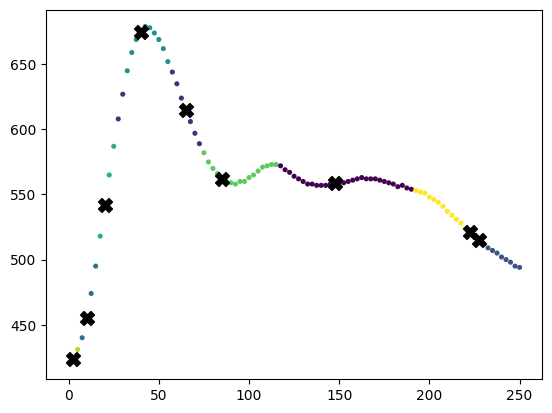

In [ ]:
r,c = subclust3(data,0.5,0)
plt.figure()
plt.scatter(data[:,1],data[:,0], c=r, s=7)
plt.scatter(c[:,1],c[:,0], marker='X',s=100,c="black")
plt.show()

In [18]:
"""
Implementación similar a genfis2 de Matlab.
Sugeno type FIS. Generado a partir de clustering substractivo.
"""


def gaussmf(data, mean, sigma):
    return np.exp(-((data - mean)**2.) / (2 * sigma**2.))

######################################################################

class fisRule:
    def __init__(self, centroid, sigma):
        self.centroid = centroid
        self.sigma = sigma

#################################################################################################################

# ESTA EDITADO EL DEF VIEW PARA AGRANDAR EL ESPACIO EN X EN EL GRAFICO

class fisInput:
    def __init__(self, min,max, centroids):
        self.minValue = min
        self.maxValue = max
        self.centroids = centroids


    def view(self):
        #x = np.linspace(self.minValue,self.maxValue,20)
        x = np.linspace(self.minValue -400,self.maxValue + 400,30)

        plt.figure()
        for m in self.centroids:
            s = (self.minValue-self.maxValue)/8**0.5
            y = gaussmf(x,m,s)
            plt.plot(x,y)

##################################################################################################################

class fis:
    def __init__(self):
        self.rules=[]
        self.memberfunc = []
        self.inputs = []


###################################################################################################################
    def genfis(self, data, radii):

        start_time = time.time()
        #El método comienza midiendo el tiempo de ejecución.

        labels, cluster_center = subclust3(data, radii,0) #cluster substractivo

        print("--- %s seconds ---" % (time.time() - start_time))
        n_clusters = len(cluster_center)
        cluster_center = cluster_center[:,:-1]
         #  Se calcula el número de clusters obtenidos (n_clusters) a partir de los centroides y se recorta la última columna de cluster_center,
         #  que generalmente contiene información adicional que no se utiliza en el modelo Sugeno.


        P = data[:,:-1]
        #Se obtienen las variables de entrada P a partir de los datos de entrada data. Luego,
        #  se calculan los valores máximos (maxValue) y mínimos (minValue) de cada variable de entrada.

        #T = data[:,-1]
        maxValue = np.max(P, axis=0)
        minValue = np.min(P, axis=0)

        self.inputs = [fisInput(maxValue[i], minValue[i],cluster_center[:,i]) for i in range(len(maxValue))]
        #  Se crea una lista de objetos fisInput para cada variable de entrada. Cada objeto fisInput se inicializa con su valor máximo, mínimo y
        #  los centroides de los clusters correspondientes a esa variable.
        self.rules = cluster_center
        self.entrenar(data)

######################################################################################################################
    def entrenar(self, data):
        P = data[:,:-1]
        T = data[:,-1]
# P contiene las variables de entrada del conjunto de datos data.
# T contiene las salidas deseadas (target) del conjunto de datos data.
        
        #___________________________________________
        # MINIMOS CUADRADOS (lineal)
        sigma = np.array([(i.maxValue-i.minValue)/np.sqrt(8) for i in self.inputs]) 
        #Aquí se calcula la desviación estándar sigma para las funciones de membresía gaussianas utilizadas en el sistema Sugeno.
        #  self.inputs contiene información sobre las variables de entrada.
        
        f = [np.prod(gaussmf(P,cluster,sigma),axis=1) for cluster in self.rules]
        #  Se calcula la activación de cada regla para cada instancia del conjunto de datos P.
        #  Esto se hace multiplicando las funciones de membresía gaussianas por cada regla y luego tomando el producto.
        #  El resultado es una lista de valores de activación para cada regla y cada instancia de entrada.

        nivel_acti = np.array(f).T
        #  nivel_acti es una matriz donde cada fila corresponde a una instancia del conjunto de datos y cada columna corresponde a una regla.
        #  Contiene los valores de activación de cada regla para cada instancia.


        print("nivel acti")
        print(nivel_acti)
        sumMu = np.vstack(np.sum(nivel_acti,axis=1))
        # sumMu es un vector que contiene la suma de los valores de activación para cada instancia. 
        # Esto se usa en el cálculo de los coeficientes del sistema Sugeno.
        print("sumMu")
        print(sumMu)
        P = np.c_[P, np.ones(len(P))]
        n_vars = P.shape[1]

        orden = np.tile(np.arange(0,n_vars), len(self.rules))
        acti = np.tile(nivel_acti,[1,n_vars])
        inp = P[:, orden]
        # Aquí se preparan los datos para el cálculo de los coeficientes. Se añade una columna de unos a la matriz P, 
        # luego se calculan las matrices acti e inp que se utilizan para construir la matriz de coeficientes A.
        


        A = acti*inp/sumMu
        #A es la matriz de coeficientes que se utiliza en el sistema de ecuaciones lineales.

        # A = np.zeros((N, 2*n_clusters))
        # for jdx in range(n_clusters):
        #     for kdx in range(nVar):
        #         A[:, jdx+kdx] = nivel_acti[:,jdx]*P[:,kdx]/sumMu
        #         A[:, jdx+kdx+1] = nivel_acti[:,jdx]/sumMu

        b = T

        solutions, residuals, rank, s = np.linalg.lstsq(A,b,rcond=None)
        self.solutions = solutions #.reshape(n_clusters,n_vars)
        #Se resuelve el sistema de ecuaciones lineales utilizando mínimos cuadrados y se almacenan las soluciones en self.solutions.
        print(solutions)
        return 0


###############################################################################################################
    def evalfis(self, data):
        sigma = np.array([(input.maxValue-input.minValue) for input in self.inputs])/np.sqrt(8)
        f = [np.prod(gaussmf(data,cluster,sigma),axis=1) for cluster in self.rules]
        nivel_acti = np.array(f).T
        sumMu = np.vstack(np.sum(nivel_acti,axis=1))

        P = np.c_[data, np.ones(len(data))]

        n_vars = P.shape[1]
        n_clusters = len(self.rules)

        orden = np.tile(np.arange(0,n_vars), n_clusters)
        acti = np.tile(nivel_acti,[1,n_vars])
        inp = P[:, orden]
        coef = self.solutions

        return np.sum(acti*inp*coef/sumMu,axis=1)

#  En resumen, este tramo toma un conjunto de datos de entrada y utiliza el sistema Sugeno previamente entrenado para calcular las salidas correspondientes.
#  este método asume que las variables de entrada y las reglas ya están configuradas en la instancia de la clase fis y
#  que los coeficientes del sistema Sugeno se han calculado previamente durante el entrenamiento


#################################################################################################################

    def viewInputs(self):
        for input in self.inputs:
            input.view()






--- 0.034207820892333984 seconds ---
nivel acti
[[0.31841415 0.79374285 0.07807486 ... 0.01889133 0.93665451 0.41485969]
 [0.33447719 0.81124746 0.08404915 ... 0.02071431 0.9473532  0.43312515]
 [0.37360499 0.85002439 0.09940875 ... 0.02557382 0.968711   0.476923  ]
 ...
 [0.52206617 0.95398002 0.16901332 ... 0.05037088 0.99993991 0.6345492 ]
 [0.52206617 0.95398002 0.16901332 ... 0.05037088 0.99993991 0.6345492 ]
 [0.51555036 0.95071796 0.16554542 ... 0.04903586 1.         0.62791112]]
sumMu
[[4.18035799]
 [4.2767163 ]
 [4.49612882]
 [4.7643817 ]
 [5.16651405]
 [5.57310639]
 [5.86260713]
 [5.97170791]
 [5.8630028 ]
 [5.57708434]
 [5.176857  ]
 [4.71545389]
 [4.2568772 ]
 [3.80384188]
 [3.44742404]
 [3.1938513 ]
 [3.04293536]
 [2.94305277]
 [2.96796169]
 [3.06800364]
 [3.1938513 ]
 [3.37115937]
 [3.62567477]
 [3.82924979]
 [4.05691035]
 [4.33103399]
 [4.54990109]
 [4.76185131]
 [4.96477633]
 [5.13572025]
 [5.27659458]
 [5.40807033]
 [5.49552999]
 [5.56126842]
 [5.62298715]
 [5.65226414

NameError: name 'r' is not defined

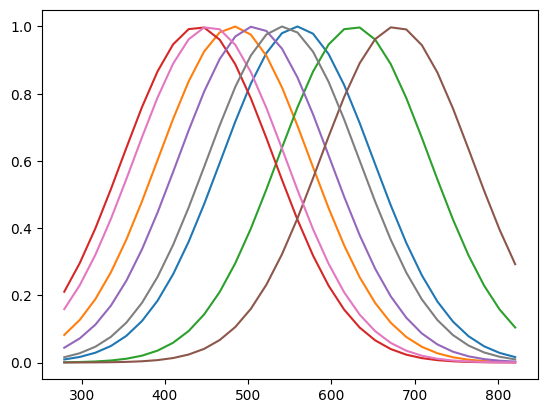

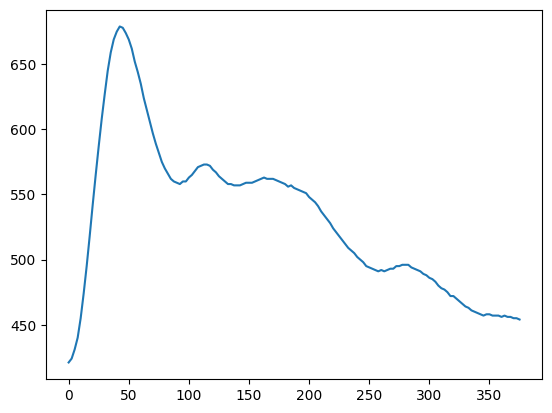

In [19]:
#test genfis 1D


""""
def my_exponential(A, B, C, x):
    return A*np.exp(-B*x)+C

data_x = np.arange(-10,10,0.1)
data_y = -0.5*data_x**3-0.6*data_x**2+10*data_x+1 #my_exponential(9, 0.5,1, data_x)

plt.plot(data_x, data_y)
 plt.ylim(-20,20)
plt.xlim(-7,7)

data = np.vstack((data_x, data_y)).T

"""

#########################################


# nuestros datos
data_y = vda.reshape(-1,1)  #data y = el vda.txt
data_x = tiempo.reshape(-1,1)  #data x = el tiempo
data = np.hstack((data_y,data_x)) 


#########################################


fis2 = fis()
#genera el sugeno, clase con reglas (vacia),funcion de pertenencia(vacia) y inputs(vacia).


fis2.genfis(data, 0.5)
# En esta le pone todo con la data , hace el clustering de nuevo dentro de la funcion!(el anterior lo dejamos para ver como quedo el clustering pero aca lo hace de vuelta)
#(0.5 es el ra).



fis2.viewInputs()
# plot de funciones gausiannas (serian las de pertenencias , centro marcado por el centro de clusters)
# las funciones gausiannas tienen maximo en el eje y en 1 [0;1], te dan el grado de pertenencia.
# el espacio x esta recortado solamente al espacio de nuestros datos, por eso no las vemos enteras.




#r = fis2.evalfis(np.vstack(data_y))


# Al evalfis le metemos datos (tipo numpy) de entrada y nos devuelve la salida calculada (el modelo aca YA esta entrenado y lo estariamos probando).



plt.figure()
plt.plot(data_x,data_y)
#grafico los datos que nos dieron.

#plt.plot(data_x,r,linestyle='--')
# aca hicimos el grafico de la funcion resultante por sugeno (entiendo que es asi)


""""
fis2.solutions
r1 = data_x*-2.29539539+ -41.21850973
r2 = data_x*-15.47376916 -79.82911266
r3 = data_x*-15.47376916 -79.82911266
plt.plot(data_x,r1)
plt.plot(data_x,r2)
plt.plot(data_x,r3)
"""


In [ ]:
# TESTEO CON FORMA 1

#testeamos al modelo, le metemos entradas al sugeno ya entrenado (con los datos vda.txt).

# Crear una lista para almacenar los errores
errores = []

x = fis2.evalfis(np.vstack(ultimos_50_elementosvda)) #resultados

print(f"las salidas a los valores introducidos son : {x}")


# muestro las salidas restadas por el valor que se supone que tenian que tener , guardados en la primer celda mas arriba.

for i in range(len(x)):
    resultado = x[i] - tiempo_prueba[i]
    errores.append(resultado)

# Calcular el promedio de los errores
promedio_error = np.mean(errores)

# Imprimir el resultado
#print(f"Errores: {errores}")
print(f"Promedio de errores: {promedio_error}")

#NOTACION:
#creo que tiene error de 20 porque tome justo los ultimos 50 datos, deberia haber tomado datos mas distribuidos... por ejemplo alternando entre todo el espacio y no reduciendolo
#solo a los ultimos.


las salidas a los valores introducidos son : [265.05851306 267.6677039  270.27667707 267.6677039  270.27667707
 267.6677039  265.05851306 265.05851306 259.85520738 259.85520738
 257.26833007 257.26833007 257.26833007 262.45309986 265.05851306
 267.6677039  270.27667707 275.47670694 278.05848119 283.16035825
 285.66957987 290.57534356 297.55626559 301.8771819  303.91515136
 307.70563321 312.54768326 312.54768326 315.10543642 317.03467399
 318.25113942 318.66602598 318.54388973 317.58003502 316.71331609
 315.57294521 314.1457395  312.41824713 314.1457395  314.1457395
 312.41824713 312.41824713 312.41824713 310.37674981 312.41824713
 310.37674981 310.37674981 308.00726547 308.00726547 305.29555104]


NameError: name 'tiempo_prueba' is not defined

In [ ]:
# TESTEO CON FORMA  2

# Crear una lista para almacenar los errores
errores = []


x = fis2.evalfis(np.vstack(vda_prueba)) # testeo con los vda para testeo

print(f"las salidas a los valores introducidos son : {x}")


# muestro las salidas restadas por el valor que se supone que tenian que tener , guardados en la primer celda mas arriba.

for i in range(len(x)):
    resultado = x[i] - tiempo_prueba[i]
    print(f" error en iteracion {i}, {resultado}")
    errores.append(resultado)

# Calcular el promedio de los errores



# Elevar al cuadrado los valores del array
errores = np.square(errores)

# Calcular la raíz cuadrada de los valores al cuadrado
errores = np.sqrt(errores)


promedio_error = np.mean(errores)
print(f"Promedio de errores: {promedio_error}")



las salidas a los valores introducidos son : [149.21803533  30.92653005 165.33995576 162.24077594 312.41824714
 107.95454157 152.58851111 134.7798465  143.99073427 180.53626502
 112.31522525  30.36667927 140.38331461 128.9430136   46.1736918
 314.14573951 262.45309987 310.37674982 143.99073427 318.54388975
  76.63419469 175.97289686  33.66529916 318.666026   301.87718191
 312.41824714 257.26833008 134.7798465  252.14037889  92.31301808
  54.819063  ]
 error en iteracion 0, [-40.78196467]
 error en iteracion 1, [-14.07346995]
 error en iteracion 2, [-39.66004424]
 error en iteracion 3, [-40.25922406]
 error en iteracion 4, [-45.08175286]
 error en iteracion 5, [30.45454157]
 error en iteracion 6, [-42.41148889]
 error en iteracion 7, [-25.2201535]
 error en iteracion 8, [6.49073427]
 error en iteracion 9, [-31.96373498]
 error en iteracion 10, [-0.18477475]
 error en iteracion 11, [0.36667927]
 error en iteracion 12, [50.38331461]
 error en iteracion 13, [106.4430136]
 error en iteracio

In [ ]:

for elemento1, elemento2 in zip(vda_entrenamiento, tiempo_entrenamiento):
    print(f" vda: {elemento1} , tiempo:{elemento2}")

NameError: name 'vda_entrenamiento' is not defined